# Airbnb Project
Using a 2015 data set, the goal is to run a number of machine learning models on Airbnb's pricing.
y = output = target = pricing

## Data set Source:
data.insideairbnb.com/united-states/dc/washington-dc/2015-10-03/data/listings.csv.gz

In [1]:
#dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense
import graphviz
import pydotplus
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from keras.models import load_model
from sklearn.svm import SVC
from sklearn.datasets import make_classification

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Read the csv file into a pandas DataFrame

airbnb_2015_df = pd.read_csv('listings.csv')
airbnb_2015_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7087327,https://www.airbnb.com/rooms/7087327,20151002231825,2015-10-03,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,Professional pictures coming soon! Welcome to ...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,18,NaN
1,975833,https://www.airbnb.com/rooms/975833,20151002231825,2015-10-03,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,Beautifully renovated Capitol Hill townhouse. ...,none,NaN,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,2.11
2,8249488,https://www.airbnb.com/rooms/8249488,20151002231825,2015-10-03,Spacious/private room for single,This is an ideal room for a single traveler th...,NaN,This is an ideal room for a single traveler th...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,1.00
3,8409022,https://www.airbnb.com/rooms/8409022,20151002231825,2015-10-03,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,Prime location right on the Potomac River in W...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
4,8411173,https://www.airbnb.com/rooms/8411173,20151002231825,2015-10-03,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",This is a 750 sq ft 1 bedroom 1 bathroom. Whi...,"Hi travellers! I live in this peaceful spot, b...",none,Silver Spring is booming. You can walk to a n...,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [3]:
# Read the csv file into a pandas DataFrame

golden_airbnb = pd.read_csv('golden.csv')
golden_airbnb.head()

,Unnamed: 0,zipcode,price,accommodates,bathrooms,bedrooms,beds,bed_type,host_is_superhost,host_identity_verified,property_type,room_type,cancellation_policy,instant_bookable,calculated_host_listings_count,host_total_listings_count,number_of_reviews,minimum_nights,city,comfort
0,0,20003,160.0,4,1.0,1.0,2.0,Real Bed,f,t,House,Entire home/apt,flexible,f,18,26,0,1,Washington,2.0
1,1,20003,350.0,6,3.0,3.0,3.0,Real Bed,f,f,House,Entire home/apt,strict,f,1,1,65,2,Washington,2.0
2,2,20782,50.0,1,2.0,1.0,1.0,Real Bed,f,t,House,Private room,flexible,f,1,2,1,2,Hyattsville,1.0
3,3,20024,95.0,2,1.0,1.0,1.0,Real Bed,f,f,House,Private room,flexible,f,1,1,0,1,Washington,2.0
4,4,20910,50.0,4,1.0,1.0,1.0,Real Bed,f,t,Townhouse,Entire home/apt,flexible,f,1,1,0,7,Silver Spring,4.0


In [4]:
# Assign X (data) and y (target)
X = pd.get_dummies(golden_airbnb[["comfort", "zipcode", "host_is_superhost", "host_identity_verified", "property_type", "room_type",
 "cancellation_policy", "instant_bookable", "calculated_host_listings_count", "number_of_reviews", "minimum_nights",
 "accommodates", "bathrooms", "bedrooms", "beds", "city", "host_total_listings_count", "bed_type"]])
y = golden_airbnb["price"]
print(X.shape, y.shape)

(3661, 92) (3661,)


In [5]:
# X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,comfort,calculated_host_listings_count,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,host_total_listings_count,zipcode_20001,...,city_Takoma Park,city_Washington,city_Washington,"city_Washington, D.C.",city_chevy chase,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
1732,1.400000,1,3,3,7,2.5,3.0,5.0,2,0,...,0,1,0,0,0,0,0,0,0,1
867,1.000000,1,0,7,1,1.0,1.0,1.0,1,0,...,0,1,0,0,0,0,0,0,0,1
3033,2.000000,2,0,2,2,1.0,1.0,1.0,2,0,...,0,1,0,0,0,0,0,0,0,1
3114,2.000000,3,0,1,2,1.0,1.0,1.0,5,0,...,0,1,0,0,0,0,0,0,0,1
2776,1.333333,2,0,5,4,1.0,3.0,3.0,2,0,...,0,1,0,0,0,0,0,0,0,1


# Linear Regression

In [6]:
# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

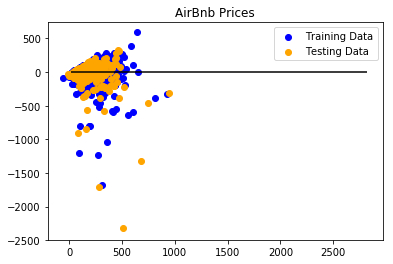

<Figure size 432x288 with 0 Axes>

In [13]:
# Make predictions using the X_test data
# Plot y_test vs y_test
# Scatter plot y_test vs predictions

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("AirBnb Prices")
plt.show()
plt.savefig("Figures/MainRegression.png")

In [14]:
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
r2a = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"MSE: {MSE}, R2: {round(r2,3)}, Radjusted: {round(r2a,3)}")


MSE: 18129.44508826841, R2: 0.394, Radjusted: 0.326


# Lasso Model

In [15]:
# Note: Use an alpha of .01 when creating the model for this activity

clf = Lasso(alpha=0.01)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
predictions = clf.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = clf.score(X_test, y_test)
r2a = 1 - (1-clf.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"MSE: {MSE}, R2: {round(r2,3)}, Radjusted: {round(r2a,3)}")

[ 1.80993726e+01  4.09132225e-02 -1.69133445e-01 -9.31726207e-01
  4.43571956e-02  4.67547960e+01  3.83238512e+01  1.42714215e+01
  9.47100026e-01  7.25340605e+00 -8.46577600e+00 -9.91162365e+00
 -0.00000000e+00  9.29165176e+00 -0.00000000e+00  5.73343190e+01
  1.87148528e+01  3.61575791e+01  4.65086660e+01  3.53376698e+01
  1.98362126e+01 -0.00000000e+00 -2.42401039e+01 -3.27539930e+01
 -3.52913754e+01 -9.99464990e+00  2.75865004e+00  5.79496048e+01
  1.15558675e+01  1.32735878e+01 -2.70049773e+01 -2.49943973e+00
 -2.08412943e+01  2.97193035e+01  1.89930738e+01  3.42409230e+01
  4.96201695e+02 -3.24523756e+01 -5.27059184e+01 -1.20624811e+01
 -3.03647462e+00 -2.50763174e+00 -0.00000000e+00 -0.00000000e+00
 -1.70107085e+01  1.74823589e+02  0.00000000e+00 -1.36827154e+01
  6.19919346e-14  7.64514876e+00 -7.04048748e-16  2.75952049e+00
  3.13402927e+01 -3.36439044e+01 -0.00000000e+00  0.00000000e+00
 -9.99842580e+00 -1.54795978e+02 -5.99014887e-01  0.00000000e+00
  7.40236364e+01  0.00000

# Ridge Model

In [16]:
# Note: Use an alpha of .01 when creating the model for this activity

ridge = Ridge(alpha=.01).fit(X_train, y_train)
predictions = ridge.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
r2a = 1 - (1-ridge.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"MSE: {MSE}, R2: {round(r2,3)}, Radjusted: {round(r2a,3)}")

MSE: 18131.499713033492, R2: 0.394, Radjusted: 0.326


# ElasticNet model

In [17]:
# Note: Use an alpha of .01 when creating the model for this activity

elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)
predictions = elasticnet.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
r2a = 1 - (1-elasticnet.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"MSE: {MSE}, R2: {round(r2,3)}, Radjusted: {round(r2a,3)}")

MSE: 18814.178782060197, R2: 0.371, Radjusted: 0.301


# Decision Tree

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [20]:

dot_data = tree.export_graphviz(
    clf, out_file=None, 
#     feature_names=iris.feature_names,  
#     class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  


graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

graph = graphviz.Source(dot_data)  
graph 

InvocationException: GraphViz's executables not found

# Random Forest

In [21]:
# Load the Dataset
target = golden_airbnb["price"]
data = golden_airbnb.drop("price", axis=1)
feature_names = data.columns
data.head()

,Unnamed: 0,zipcode,accommodates,bathrooms,bedrooms,beds,bed_type,host_is_superhost,host_identity_verified,property_type,room_type,cancellation_policy,instant_bookable,calculated_host_listings_count,host_total_listings_count,number_of_reviews,minimum_nights,city,comfort
0,0,20003,4,1.0,1.0,2.0,Real Bed,f,t,House,Entire home/apt,flexible,f,18,26,0,1,Washington,2.0
1,1,20003,6,3.0,3.0,3.0,Real Bed,f,f,House,Entire home/apt,strict,f,1,1,65,2,Washington,2.0
2,2,20782,1,2.0,1.0,1.0,Real Bed,f,t,House,Private room,flexible,f,1,2,1,2,Hyattsville,1.0
3,3,20024,2,1.0,1.0,1.0,Real Bed,f,f,House,Private room,flexible,f,1,1,0,1,Washington,2.0
4,4,20910,4,1.0,1.0,1.0,Real Bed,f,t,Townhouse,Entire home/apt,flexible,f,1,1,0,7,Silver Spring,4.0


In [22]:
# Create a random forest classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.08842794759825327

In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([4.93325564e-02, 4.66454259e-02, 1.55175794e-01, 8.17149193e-02,
       4.93736451e-02, 3.55843132e-02, 3.28004937e-02, 2.78886149e-02,
       5.37662251e-02, 2.19438652e-02, 2.60230712e-04, 2.27140557e-02,
       1.63588407e-04, 1.62790110e-02, 5.47966250e-05, 4.30304855e-04,
       1.25874499e-02, 1.95479394e-03, 1.20881842e-02, 1.67717818e-04,
       1.09486505e-02, 2.60061465e-02, 1.68789935e-02, 1.15451866e-02,
       3.67085041e-03, 3.43685566e-03, 5.96407869e-03, 7.90111398e-03,
       4.52566644e-03, 3.31560818e-03, 5.19634710e-03, 6.83250993e-03,
       1.55866200e-03, 4.84141760e-03, 9.33356616e-03, 2.93311022e-04,
       5.04429360e-04, 2.14257466e-04, 2.08672039e-04, 4.45113141e-04,
       7.01695678e-05, 1.07348950e-04, 9.24869483e-05, 7.17933256e-04,
       3.41744415e-04, 4.85029769e-05, 0.00000000e+00, 1.07293041e-02,
       1.05252750e-02, 2.03885518e-02, 1.97760898e-02, 1.61730180e-02,
       2.10131524e-03, 1.56186583e-04, 1.27268038e-04, 1.08976507e-04,
      

In [24]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15517579350570096, 'accommodates'),
 (0.08171491928349846, 'bathrooms'),
 (0.053766225061806464, 'host_identity_verified'),
 (0.04937364507927383, 'bedrooms'),
 (0.0493325563973562, 'Unnamed: 0'),
 (0.0466454259296583, 'zipcode'),
 (0.03558431316749874, 'beds'),
 (0.032800493748347564, 'bed_type'),
 (0.0278886148769799, 'host_is_superhost'),
 (0.02271405574490383, 'cancellation_policy'),
 (0.021943865240601042, 'property_type'),
 (0.01627901098694479, 'calculated_host_listings_count'),
 (0.012587449925672248, 'minimum_nights'),
 (0.012088184226406111, 'comfort'),
 (0.001954793938282139, 'city'),
 (0.0004303048547304404, 'number_of_reviews'),
 (0.00026023071219742443, 'room_type'),
 (0.0001635884068959569, 'instant_bookable'),
 (5.479662502922419e-05, 'host_total_listings_count')]

# KNN

k: 1, Train/Test Score: 0.980/0.048
k: 3, Train/Test Score: 0.379/0.039
k: 5, Train/Test Score: 0.277/0.037
k: 7, Train/Test Score: 0.238/0.035
k: 9, Train/Test Score: 0.220/0.035
k: 11, Train/Test Score: 0.204/0.043
k: 13, Train/Test Score: 0.179/0.048
k: 15, Train/Test Score: 0.161/0.047
k: 17, Train/Test Score: 0.151/0.051
k: 19, Train/Test Score: 0.143/0.055


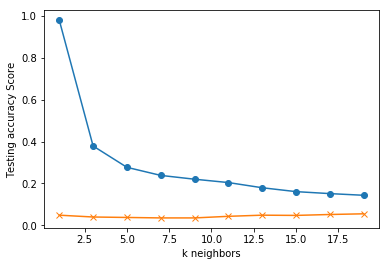

<Figure size 432x288 with 0 Axes>

In [29]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
plt.savefig("Figures/KNN.png")

In [30]:
# Note that k: 2 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print('k=2 Test Acc: %.3f' % knn.score(X_test, y_test))

k=2 Test Acc: 0.037


# Support Vector Machine (SVM)

In [31]:
# Support vector machine linear classifier
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [32]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.savefig("Figures/SVM.png")
plt.show()

TypeError: unhashable type: 'slice'

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

In [ ]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)
scores

In [ ]:
scores.mean()

# Deep Learning / Neural Network

In [ ]:
# Create Data

In [ ]:
# Visualize Data
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
# One-hot encoding
fit(X_train)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

NameError: name 'fit' is not defined

In [ ]:
# Create a Neural Network model here
dl_model = Sequential()
dl_model.add(Dense(units=100, activation='relu', input_dim=323))  #fits the shape
dl_model.add(Dense(units=2, activation='softmax')) #gives the 0 or 1
#if the computer crashes due to memory go to 50 then 25 then 12 units then layer loss

In [ ]:
dl_model.summary()

In [ ]:
# Compile the model
dl_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
dl_model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [ ]:
deep_model.summary()

In [ ]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Save the model
model.save("airbnb_trained.h5")

In [ ]:
# Load the model
from keras.models import load_model
airbnb_model = load_model("airbnb_trained.h5")

In [ ]:
model_loss, model_accuracy = airbnb_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# Kmeans

In [ ]:
#data 
X, _ =

In [ ]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.savefig("Figures/Figure2.png")

In [ ]:
kmeans = KMeans(n_clusters=4) #either loop through like previous exercise OR figure it out by looking at the data

In [ ]:
# Fit the model to the data
kmeans.fit(data)

In [ ]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

In [ ]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()
plt.savefig("Figures/Figure2.png")

In [ ]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
centers

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.savefig("Figures/Figure2.png")
plt.show()